# KNN (K-Nearest Neighbors) Algorithm

This notebook is for learning and implementing KNN algorithm. KNN algorithm is one of the simples and easiest to implement supervised ML algorithms. It can be used for classification and regression problems. The KNN algorithm works on assuming that similar things with similar features are in close proximity to each other. The value of k when working with this algorithm is too important. To get the best value for k, usually ML Engineers get the number of entries in the dataset(n) and sqrt it, so k = sqrt(n). So for values of k closer to 1 we get less stable predictions, because in general KNN works as majority voting. So with increasing the values of K we are going to get better results to a certain point when the results will start to get worse. The bad thing for this algorithm in general is because it's slower compared to other algorithms. Because it's slower this algorithm works better with smaller datasets

## Diabetes dataset

The idea for this dataset is to predict whether the patient has diabetes or doesn't have it.
The colums(information) that we can get from this dataset are:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

In [41]:
# Importing some basic useful data science libraries so we can start to work with the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Exploration and Cleaning

In [4]:
# Importing the data and looking through the first 10 entries
df = pd.read_csv('./diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
# Looking through the data types of the columns and how many entries we have for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Looking if we have any values in the data that are null (even if we can see that in the last code block)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Some values are not good to be 0 so we will replace them with the mean of the column
df.loc[df['Glucose'] == 0, 'Glucose'] = df['Glucose'].mean()
df.loc[df['BloodPressure'] == 0, 'BloodPressure'] = df['BloodPressure'].mean()
df.loc[df['SkinThickness'] == 0, 'SkinThickness'] = df['SkinThickness'].mean()
df.loc[df['Insulin'] == 0, 'Insulin'] = df['Insulin'].mean()

In [8]:
# Again looking at the dataframe to see if the change has been made
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.000000,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.000000,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.1,2.288,33,1
5,5,116.0,74.000000,20.536458,79.799479,25.6,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.0,0.248,26,1
7,10,115.0,69.105469,20.536458,79.799479,35.3,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.5,0.158,53,1
9,8,125.0,96.000000,20.536458,79.799479,0.0,0.232,54,1


In [9]:
# Looking at the correlation between the columns and how they are related
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.017683,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.235147,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.242656,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.501131,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189337,0.157806,0.038652,0.179185
BMI,0.017683,0.235147,0.242656,0.501131,0.189337,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.292695,0.173844,0.238356,1.000000


In [10]:
# Some statistical information about the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Visualisation

<BarContainer object of 2 artists>

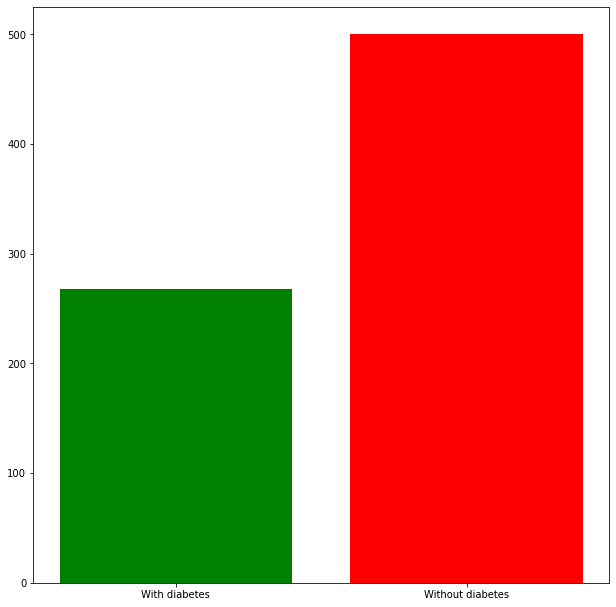

In [11]:
# Number of people with diabetes and without diabetes
pos = df['Outcome'].value_counts()[1]
neg = df['Outcome'].value_counts()[0]
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(['With diabetes', 'Without diabetes'], [pos, neg], color=['green', 'red'])

<BarContainer object of 3 artists>

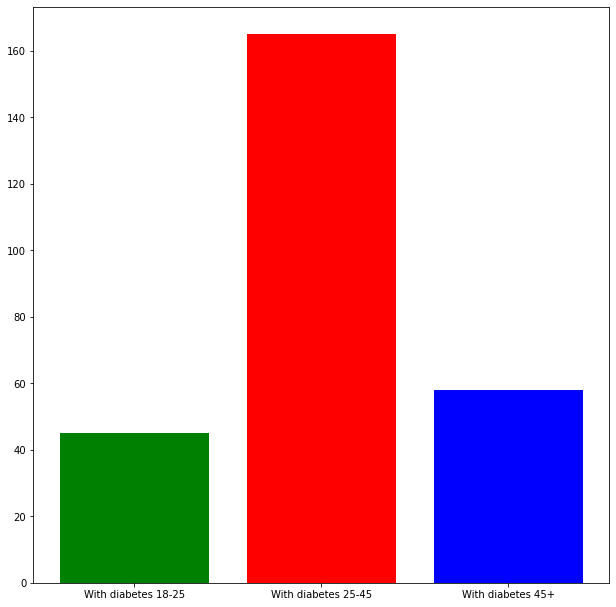

In [12]:
# People with diabetes between 18 and 25, 25 and 45 and 45+
pos_18 = df[(df['Outcome'] == 1 ) & (df['Age'] <= 25)].count().Outcome
pos_45 = df[(df['Outcome'] == 1 ) & (df['Age'] > 25) & (df['Age'] <=45)].count().Outcome
pos_other = df[(df['Outcome'] == 1 ) & (df['Age'] > 45)].count().Outcome
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(['With diabetes 18-25', 'With diabetes 25-45', 'With diabetes 45+'], [pos_18, pos_45, pos_other], color=['green', 'red', 'blue'])

<BarContainer object of 2 artists>

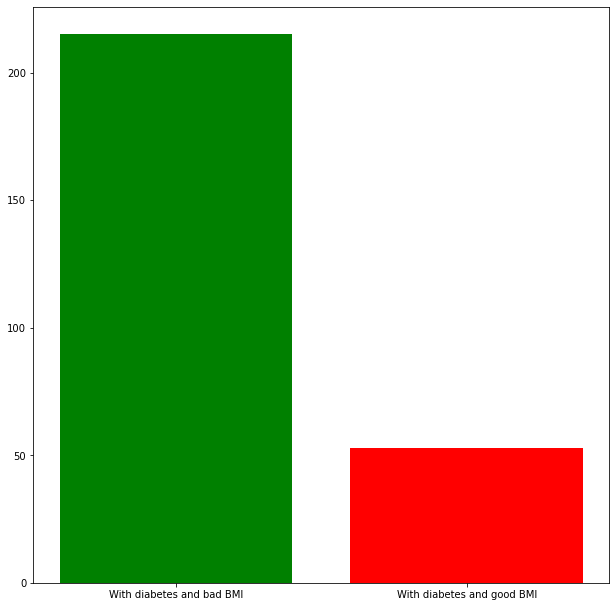

In [13]:
# People with diabetes with bad BMI and good BMI(Body Mass Index)
bad_BMI = df[(df['Outcome'] == 1 ) & (df['BMI'] > 30)].count().Outcome
good_BMI = df[(df['Outcome'] == 1 ) & (df['BMI'] <= 30)].count().Outcome
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(['With diabetes and bad BMI', 'With diabetes and good BMI'], [bad_BMI, good_BMI], color=['green', 'red'])

<BarContainer object of 2 artists>

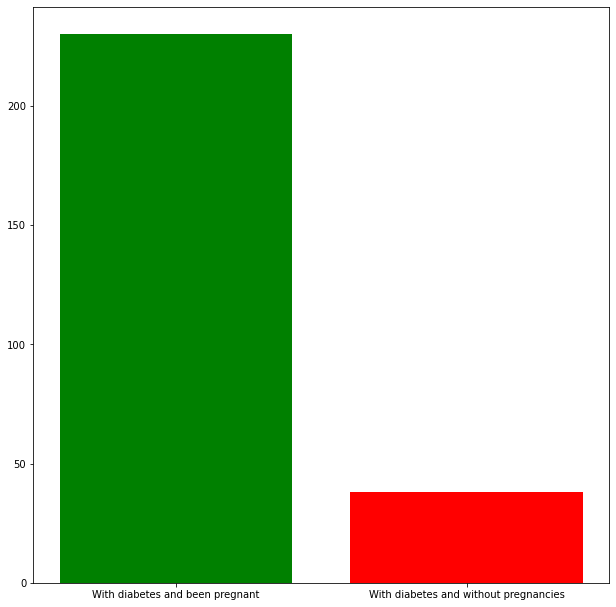

In [14]:
# People that have diabetes and have been pregnant and people that have diabetes and have not been pregnant
pregnant = df[(df['Outcome'] == 1 ) & (df['Pregnancies'] != 0)].count().Outcome
not_pregnant = df[(df['Outcome'] == 1 ) & (df['Pregnancies'] == 0)].count().Outcome
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(['With diabetes and been pregnant', 'With diabetes and without pregnancies'], [pregnant, not_pregnant], color=['green', 'red'])

### Spliting data for training and testing

In [15]:
# Importing libraries for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

In [16]:
# X is the data without the class(the last column)
x = df.iloc[:,:-1]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [17]:
# Y is only the class column data
y = df.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [18]:
# Splitting the data into training and testing sets, 80% of the data will be in the training set and 20% of the data will be in the testing set(0.2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Training with ML algorithm and evaluating with metrics

In [19]:
# Importing the classifier and the evaluation metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import math

In [20]:
# Setting up the model and training it
k = int(math.sqrt(len(x_train))) 
if k % 2 == 0:
    k = k + 1
model = KNeighborsClassifier(n_neighbors = k, p = 2, metric = 'euclidean')
model.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=25)

In [21]:
# Predicting the test set results
y_pred = model.predict(x_test)

In [22]:
# Evaluating the model
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy:  0.7792207792207793
F1 Score:  0.6136363636363638
Classification Report:                precision    recall  f1-score   support

           0       0.82      0.87      0.85       107
           1       0.66      0.57      0.61        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154

Confusion Matrix: 
 [[93 14]
 [20 27]]


For what we can conclude from this is that the algorithm is not too good. We have 77% accuracy and the more important f1 score which is 61%. Because the classification is 0 or 1(diabetes or no diabetes) this problem is more for logical regression. So we can try all of this using the Logistic Regression algorithm

# Logistic Regression Algorithm

Logistic Regression Algorithm is a simple algorithm used for supervised learning. Even if it's called "regression", this algorithm is used with classification. Usually it's uses are for problem where we have two outcomes, so it's binary. It can be 0 or 1, yes or no, etc. It comes out from the linear regression but it differs a lot from it. If we graph the logistic regression, the graph will be something like S(Sigmund). Because this problem has outcomes 1 for diabetes and 0 for no diabetes, the logistic regression is perfect solution for this problem.

In [38]:
model = LogisticRegression(solver = 'newton-cg', max_iter = 1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [39]:
y_pred = model.predict(x_test)

In [40]:
# Evaluating the model
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy:  0.8181818181818182
F1 Score:  0.6666666666666666
Classification Report:                precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154

Confusion Matrix: 
 [[98  9]
 [19 28]]


Logistic Regression is better than KNN in this case for sure !